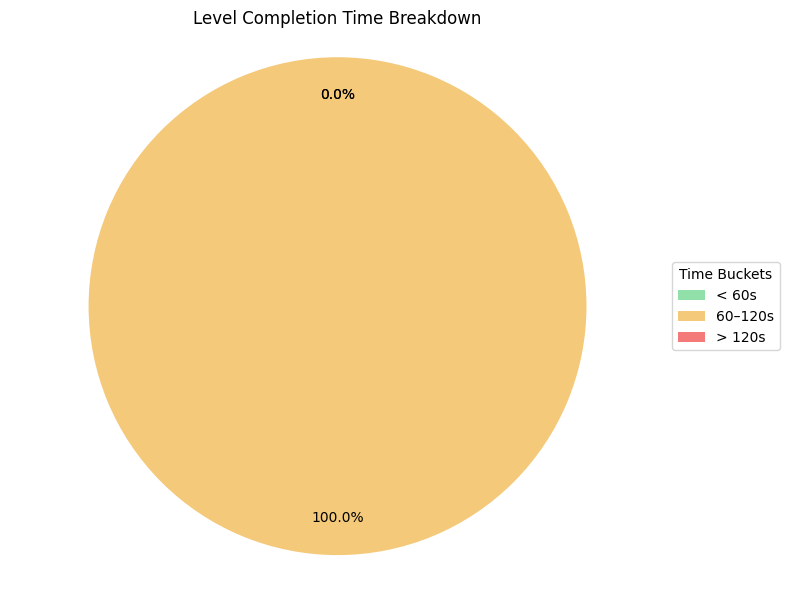

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

sheet_url = "https://docs.google.com/spreadsheets/d/1URpGUTsUu93yHHufkVzsDPOtoI3dNeLCjYz-jP8BqB8/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")

df = pd.read_csv(csv_url)
df["Elapsed Time"] = pd.to_numeric(df["Elapsed Time"], errors='coerce')
df = df.dropna(subset=["Elapsed Time"])

def categorize(t):
    if t < 60:
        return "< 60s"
    elif t <= 120:
        return "60–120s"
    else:
        return "> 120s"

df["Bucket"] = df["Elapsed Time"].apply(categorize)
bucket_counts = df["Bucket"].value_counts().reindex(["< 60s", "60–120s", "> 120s"]).fillna(0)

colors = ["#91e0a9", "#f4c97a", "#f47a7a"]

plt.figure(figsize=(8, 6))  # Slightly larger figure to accommodate legend

# Create the pie chart
patches, texts, autotexts = plt.pie(
    bucket_counts,
    labels=None,  # Remove labels from pie slices
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85  # Move percentages inside a bit
)

plt.title("Level Completion Time Breakdown")
plt.axis("equal")

# Add a separate legend
plt.legend(
    patches,
    bucket_counts.index,
    title="Time Buckets",
    loc="center left",
    bbox_to_anchor=(1, 0.5)  # Position legend outside the pie chart
)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()